In [2]:
def function1(input1):
    return input1+ " from first function"

def function2(input2):
    return input2+ " from second function"

def function3(input3):
    return input3+ " from third function"

In [3]:
function1("Agent")

'Agent from first function'

In [5]:
from langgraph.graph import Graph

In [11]:
workflow=Graph()
# add node
workflow.add_node("func1",function1)
workflow.add_node("func2",function2)
workflow.add_node("func3",function3)

#add edges
workflow.add_edge("func1","func2")
workflow.add_edge("func2","func3")

# add entry point 

workflow.set_entry_point("func1")

# add finish point
workflow.set_finish_point("func3")


In [12]:
app=workflow.compile()

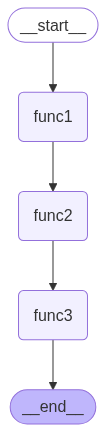

In [18]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [19]:
app.invoke("dd")

'dd from first function from second function from third function'

In [24]:
from langchain.agents import tool

@tool
def function_tool1(input1)->str:
    '''fff'''
    return input1+ " from first function"
@tool
def function_tool2(input2)->str:
    '''ddd'''
    return input2+ " from second function"



In [25]:
chain = function_tool1 | function_tool2

chain.invoke("Vishu")

'Vishu from first function from second function'

In [26]:
for output in app.stream("Rohit"):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from func1
_______
Rohit from first function


here is output from func2
_______
Rohit from first function from second function


here is output from func3
_______
Rohit from first function from second function from third function




In [27]:
from dotenv import load_dotenv
import os
load_dotenv()

os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")
os.environ["PINECODE_API_KEY"]=os.getenv("PINECODE_API_KEY")
os.environ["GOOGLE_API_KEY"]=os.getenv("GOOGLE_API_KEY")
os.environ["HUGGINGFACE_API_KEY"]=os.getenv("HUGGINGFACE_API_KEY")
os.environ["LANGCHAIN_API_KEY"]=os.getenv("LANGCHAIN_API_KEY")
os.environ["LANGCHAIN_PROJECT"]=os.getenv("LANGCHAIN_PROJECT")
os.environ["LANGCHAIN_TRACING_V2"]=os.getenv("LANGCHAIN_TRACING_V2")

In [40]:
from langchain_google_genai import ChatGoogleGenerativeAI


def llm(input):
    model=ChatGoogleGenerativeAI(model='gemini-1.5-flash')
    return model.invoke(input).content

def count_token(input):
    token=input.split()
    return f" approximate token count is {len(token)}"

In [41]:
from langgraph.graph import Graph
llm_workflow=Graph()

llm_workflow.add_node("llm",llm)
llm_workflow.add_node("count_token",count_token)

llm_workflow.add_edge("llm","count_token")

llm_workflow.set_entry_point("llm")

llm_workflow.set_finish_point("count_token")


llm_app=llm_workflow.compile()







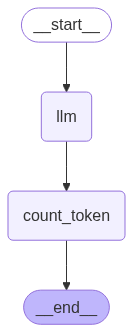

In [38]:
from IPython.display import Image, display
display(Image(llm_app.get_graph().draw_mermaid_png()))

In [42]:
llm_app.invoke("Tell me about India")

' approximate token count is 470'

In [46]:
for output in llm_app.stream("latest news on Elon Musk?"):
    for key,value in output.items():
        print("\n------------------")
        print(f"\n Function call by Step : {key} ")
        print(f"\n Output to the Step : {value} ")
        print("\n------------------")


------------------

 Function call by Step : llm 

 Output to the Step : Recent news about Elon Musk is dominated by several key areas:

* **X (formerly Twitter):**  Much of the news revolves around the ongoing changes and controversies at X.  This includes reports on:
    * **Financial struggles:**  News outlets have published articles about X's financial performance, including concerns about debt and advertising revenue.
    * **Content moderation:** Debates continue regarding X's content moderation policies and their impact on free speech and misinformation.  Specific instances of controversial content and policy changes frequently make headlines.
    * **Platform changes:**  Constant updates to the platform's features and functionality, often announced directly by Musk himself on X, are frequently reported.  These changes often spark debate among users.

* **Tesla:**  News related to Tesla often includes:
    * **Financial performance:**  Reports on Tesla's quarterly earnings and 